# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write vectorized code whenever possible.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in the provided `hw2.py` python module only. All the logic you write is imported and used in this jupyter notebook.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports detected in `hw2.py` will earn you the grade of 0, even if you only used them for testing.
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install. Changes of the configuration we provided are at your own risk. Code that cannot run will also earn you the grade of 0.
7. Write your own code. Cheating will not be tolerated. 
8. Submission includes the `hw2.py` file and this notebook. Answers to qualitative questions should be written in markdown cells (with $\LaTeX$ support).
9. You are allowed to include additional functions.
10. Submission: zip only the completed jupyter notebook and the python file `hw2.py`. Do not include the data or any directories. Name the file `ID1_ID2.zip` and submit only one copy of the assignment.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Implement a decision tree from scratch.
4. Prune the tree to achieve better results.
5. Visualize your results and the tree.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw2 import * # this imports all functions from hw2.

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Warmup - OOP in python

Our decision tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [36]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [37]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x16d6ff0cc88>, <__main__.Node at 0x16d6ff0c6a0>]

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn - a popular machine learning and data science library in python. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [38]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures

Implement the functions `calc_gini` (5 points) and `calc_entropy` (5 points) in the python file `hw2.py`. You are encouraged to test your implementation using the cell below.

## Building a Decision Tree

Use a Python class to construct the decision tree (look at the `DecisionNode` class in the python file `hw2.py`. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. In this exercise, create at most a single split for each node of the tree. The threshold you need to use for this exercise are the average of each consecutive pair of values. For example, assume some features contains the following values: [1,2,3,4,5]. You should use the following thresholds [1.5, 2.5, 3.5, 4.5]. 
4. When constructing the tree, test all possible thresholds for each feature. The stopping criteria is a pure tree.

Complete the class `DecisionNode` in the python file `hw2.py`. The structure of this class is entirely up to you. Complete the function `build_tree` in the python file `hw2.py`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points).

In [39]:
# python support passing a function as arguments to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini)
tree_entropy = build_tree(data=X_train, impurity=calc_entropy)

## Tree evaluation

Complete the functions `predict` and `calc_accuracy` in the python file `hw2.py`. You are allowed to implement this functionality as a class method.

After building both trees using the training set (using Gini and Entropy as impurity measures), you should calculate the accuracy on the test set and print the measure that gave you the best test accuracy. For the rest of the exercise, use that impurity measure. (10 points)

In [40]:
print(calc_accuracy(tree_entropy, X_test))
print(calc_accuracy(tree_gini, X_test))

0.9370629370629371
0.9300699300699301


## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the p-value. What p-value gives you the best results? Does the results support the theory you learned in class regarding Chi square pruning? Explain. (20 points)

**Note**: You need to change the `DecisionNode` to support Chi square pruning. Make sure the `chi_value=1` corresponds to no pruning. The values you need from the Chi square table are available in the python file `hw2.py`.

In [41]:
training = []
testing  = []


for chi_value in [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]:
    if chi_value == 1:
        chi_tree = build_tree(data=X_train,impurity=calc_entropy)
    else:
        chi_tree = build_tree(data=X_train,impurity=calc_entropy,chi=chi_table[chi_value])
    training.append(calc_accuracy(chi_tree, X_train))
    testing.append(calc_accuracy(chi_tree, X_test))

[1.0, 0.9953051643192489, 0.9882629107981221, 0.9671361502347418, 0.9647887323943662, 0.9553990610328639, 0.9553990610328639]
[0.9370629370629371, 0.9440559440559441, 0.9440559440559441, 0.916083916083916, 0.916083916083916, 0.9230769230769231, 0.9230769230769231]


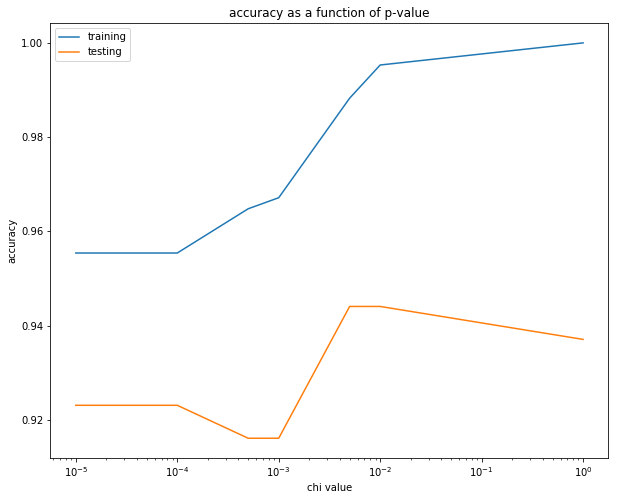

In [42]:
print(training)
print(testing)
x = np.arange(0.00001, 1, 0.1)
y = np.arange(90, 100, 1)
fig, ax = plt.subplots()
ax.plot([1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001], training)
ax.plot([1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001], testing)
ax.legend(('training','testing'))
plt.xscale('log')
ax.set(xlabel='chi value', ylabel='accuracy',title='accuracy as a function of p-value')
plt.show()

The p-value who gives the best results depends on the set we're testing. When testing the training set we get better accuracy with higher p-values, beacuse the algorithm has freedom to build the tree as big as possible till all the nodes are leaves, which means the accuracy of predicting the training set will be better. When testing the testing set we want to find the best p-value who doesn't overfit the training set and yet have enough nodes to get more accurate guess.
Yes, the results support the theory we learnt in class as I explained above. When dealing with the training set obviously the more nodes the better accuracy you'll get and when dealing with the testing set you want to have enough nodes to be able to get closer to the right prediction and yet not have too many nodes and overfit the training set.

## Post pruning

Construct a decision tree without Chi square pruning. For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with just the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree. Explain the results: what would happen to the training and testing accuracies when you remove nodes from the tree? Can you suggest a different approach to achieve better results? (20 points)

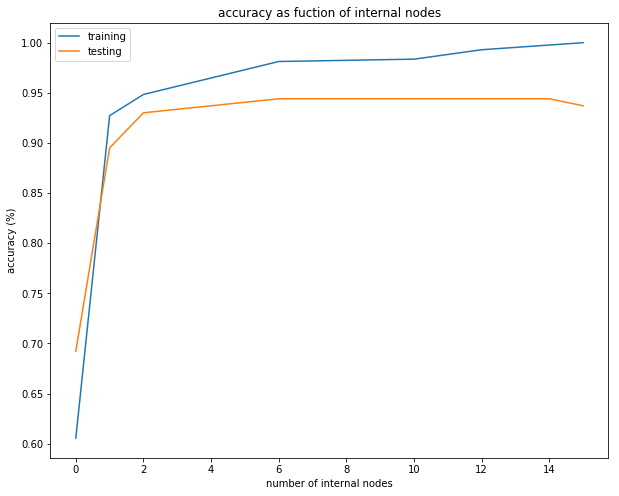

In [43]:
tree_entropy = build_tree(data=X_train, impurity=calc_entropy)
testing_accuracies = np.array([calc_accuracy(tree_entropy, X_test)])
training_accuracies = np.array([calc_accuracy(tree_entropy, X_train)])
numOfNodesPruning = np.array([num_of_nodes(tree_entropy)])
testing_accuracies, training_accuracies, numOfNodesPruning = post_pruning(tree_entropy, X_test, testing_accuracies, training_accuracies, numOfNodesPruning)
x = np.arange(32, 0, 2)
y = np.arange(60, 100, 1)
fig, ax = plt.subplots()
ax.plot(numOfNodesPruning, training_accuracies)
ax.plot(numOfNodesPruning, testing_accuracies)
ax.legend(('training', 'testing'))
ax.set(xlabel='number of internal nodes', ylabel = 'accuracy (%)', title = 'accuracy as fuction of internal nodes')
plt.show()

when you remove nodes from the tree, the training accuracy is obviously smaller because the entire tree classify the training data perfectly so for each node you remove the accuracy will be lower.
for the testing dataset at first when you remove the first nodes the accuracy will go up because you remove nodes that overfit the training set and only do wrong to the accuracy of the testing set and when you remove the nodes you remove it considering the best node removal for the accuracy of the testing data set. when you remove more and more nodes you are being left with a small tree that can't classify accuratly both the training and the testing data's untill you get to a single node which is the root that just classify by the majoraty of the nodes label in the training set.
the algorithem could have been better by not being a greedy algorithem. when you remove the best node to remove greedily you are not considering the the option of for example removing 2 nodes that removing them together might improve the accuracy even more than the improvement possible when removing only one by one greedily.

## Print the tree

Complete the function `print_tree` in the python file `hw2.py` and print the tree using the chosen impurity measure and no pruning. Your code should like something like this (10 points):
```
[X0 <= 1],
  [X1 <= 2]
    [X2 <= 3], 
       leaf: [{1.0: 10}]
       leaf: [{0.0: 10}]
    [X4 <= 5], 
       leaf: [{1.0: 5}]
       leaf: [{0.0: 10}]
   leaf: [{1.0: 50}]
```


In [44]:
tree_entropy = build_tree(data=X_train, impurity=calc_entropy)
print_tree(tree_entropy)


[27 <= 0.14235],
  [13 <= 21.924999999999997],
    [4 <= 0.079285],
      leaf: [{0.0: 140.0}]
      leaf: [{1.0: 1.0}]
    [21 <= 29.0],
      leaf: [{0.0: 5.0}]
      [1 <= 20.52],
        leaf: [{0.0: 1.0}]
        leaf: [{1.0: 8.0}]
  [3 <= 696.25],
    [1 <= 19.72],
      leaf: [{0.0: 13.0}]
      [6 <= 0.073105],
        leaf: [{0.0: 3.0}]
        leaf: [{1.0: 7.0}]
    [27 <= 0.1349],
      [15 <= 0.02744],
        leaf: [{1.0: 6.0}]
        [0 <= 13.225000000000001],
          leaf: [{0.0: 4.0}]
          leaf: [{1.0: 1.0}]
      [10 <= 0.62555],
        [1 <= 18.630000000000003],
          leaf: [{1.0: 2.0}]
          leaf: [{0.0: 1.0}]
        [21 <= 33.349999999999994],
          [21 <= 33.56],
            leaf: [{1.0: 17.0}]
            leaf: [{0.0: 1.0}]
          leaf: [{1.0: 216.0}]
